# DoS ML System

## Importing libraries

In [1]:
import warnings
warnings.filterwarnings('ignore')
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from lightgbm import LGBMClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, ExtraTreesClassifier, BaggingClassifier, VotingClassifier, StackingClassifier
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score
import joblib
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
import numpy as np

from functions_ml import *
model_repo = ".\\DoS_system\\"
file_path = '.\Files\\DoS\\'

## Preprocessing data for binary classification (DoS (DDoS and DoS) or Benign)

In [2]:
train_sets, test_sets = get_train_and_test_files()
print(len(train_sets), len(test_sets))

X_columns = x_columns(read_csv_file(train_sets[0]))
y_column = 'label'

135 34


## Scaling

In [3]:
scaler = get_or_define_and_save_scaler(model_repo, train_sets + test_sets, X_columns)

100%|██████████| 169/169 [01:56<00:00,  1.45it/s]


## Define variables

In [4]:
performance_path = 'performance.csv'
local_path = '.\\DoS_system\\'
after_build_csv = 'after_build_set_scaled.csv'

# Get path data
build_sets, after_build_sets = get_train_and_test_files(path_to_datasets=file_path)
print(len(build_sets) + len(after_build_sets))

# Get build datasets
build_nb = round(len(build_sets) * 0.8)
train_sets = build_sets[:build_nb]
# train_sets = train_sets[: round(len(train_sets) * 0.5)]
test_sets = build_sets[build_nb:]
# test_sets = test_sets[: round(len(test_sets) * 0.5)]

# Define different columns
X_columns = x_columns(read_csv_file(train_sets[0], path_to_datasets=file_path))
X_columns = X_columns[:-2]
print(len(X_columns))

95
46


# Multiclass classification 

## Building model

In [8]:
simpleModelsDef = [
    # {
    #     "Name": "DT",
    #     "Model": DecisionTreeClassifier(random_state = 42)
    # },
    # {
    #     "Name": "RF",
    #     "Model": RandomForestClassifier(random_state = 42)
    # },
    # {
    #     "Name": "ET",
    #     "Model": ExtraTreesClassifier(random_state = 42)
    # },
    # {
    #     "Name": "XGB",
    #     "Model": XGBClassifier(random_state = 42)
    # },
    # {
    #     "Name": "Cat",
    #     "Model": CatBoostClassifier(random_state = 42, verbose = 0)
    # },
    # {
    #     "Name": "LIGHT",
    #     "Model": LGBMClassifier(random_state = 42)
    # },
    # {
    #     "Name": "GBoost",
    #     "Model": GradientBoostingClassifier(random_state = 42)
    # },
    {
        "Name": "Adaboost",
        "Model": AdaBoostClassifier(random_state = 42)
    },
]

100%|██████████| 17/17 [00:16<00:00,  1.02it/s]


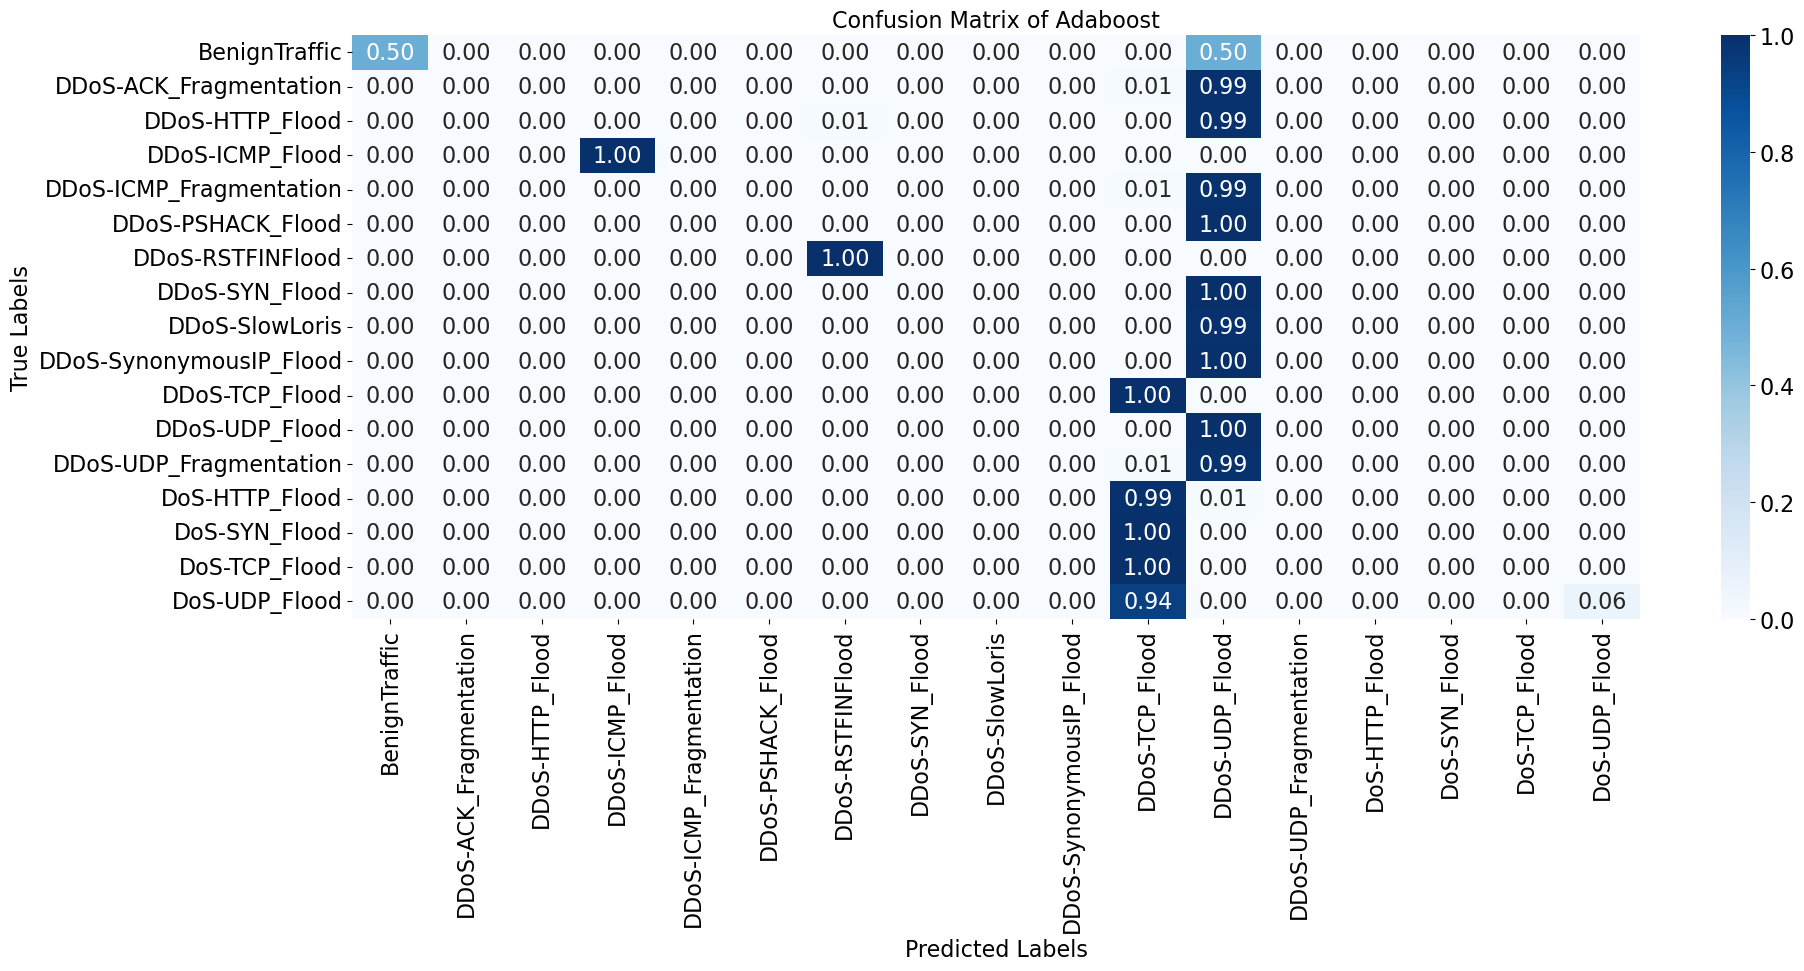

100%|██████████| 1/1 [42:26<00:00, 2546.57s/it]


['.\\DoS_system\\encoder.joblib']

In [9]:
# Import or define encoder and performance dataframe
encoder = get_or_define_encoder(model_repo)
performance = get_or_define_performance_df(model_repo, performance_path)

# # Load selected X columns
# selected_X = pd.read_csv(model_repo+'selected_X_columns.csv').values

# # Map selected X columns
# selected_X = list(map(lambda x: x[0], selected_X))
# print(selected_X)

selected_X = X_columns

# Buidling models
plotConfusionMatrix = True
figsizeConfusionMatrix = (20, 10)
saveConfusionMatrix = True
for model in tqdm(simpleModelsDef):
    # Build model
    performance, encoder = build_model_multifiltered(model['Model'], ''+model['Name'], train_sets, test_sets, file_path, performance, model_repo+'', X_columns=selected_X, y_column=y_column, encoder=encoder, scaler=scaler, \
                                                     confusionMatrix=plotConfusionMatrix, saving=saveConfusionMatrix, pathToSave=model_repo+''+model['Name'], figsize=figsizeConfusionMatrix, modelLabel=model['Name'])

    # Save performance
    performance.to_csv(model_repo + performance_path, index=False)

# Save the encoder to a file
joblib.dump(encoder, model_repo+'encoder.joblib')